In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd

In [7]:
# Leitura do dataset
df = pd.read_csv("data/dataset.csv")

In [8]:
# Retirar linhas com valores vazios (Em 2013 só tem pontos do enduro e totais)
df = df.dropna()
df = df.reset_index(drop=True)

In [9]:
# Verificação dos tipos de dados
df.dtypes

Ano            int64
Posicao        int64
Numero         int64
Equipe        object
Estado        object
Seguranca    float64
Projeto      float64
Dinamicas    float64
Enduro       float64
Total        float64
dtype: object

In [10]:
# Otimizando a alocação de espaço das colunas numéricas
df["Ano"] = pd.to_numeric(df["Ano"], downcast='integer')
df["Numero"] = pd.to_numeric(df["Numero"], downcast='integer')
df["Numero"] = pd.to_numeric(df["Numero"], downcast='float')
df["Seguranca"] = pd.to_numeric(df["Seguranca"], downcast='float')
df["Dinamicas"] = pd.to_numeric(df["Dinamicas"], downcast='float')
df["Enduro"] = pd.to_numeric(df["Enduro"], downcast='float')
df["Total"] = pd.to_numeric(df["Total"], downcast='float')
df.dtypes

Ano            int16
Posicao        int64
Numero          int8
Equipe        object
Estado        object
Seguranca    float32
Projeto      float64
Dinamicas    float32
Enduro       float32
Total        float32
dtype: object

In [11]:
# Pontuação da prova de segurança englobava outras provas até 2014
df = df.drop(df[df['Ano'] < 2014].index).reset_index(drop=True)
df.head()

,Ano,Posicao,Numero,Equipe,Estado,Seguranca,Projeto,Dinamicas,Enduro,Total
0,2014,1,5,MANGUE,PE,0.0,269.57,190.580002,400.000000,860.159973
1,2014,2,6,MANGUE,PE,0.0,267.23,197.580002,365.959991,830.770020
2,2014,3,9,POLI,SP,0.0,241.65,228.229996,280.850006,750.719971
3,2014,4,2,FEI,SP,0.0,272.63,178.800003,280.850006,732.270020
4,2014,5,3,FEI,SP,0.0,267.73,148.339996,314.890015,730.960022


In [6]:
# Criação de uma coluna para categorizar cada equipe com relação a região
condition = [(df['Estado'].isin(['RR', 'AP', 'AM', 'PA', 'AC', 'RO', 'TO'])),
             (df['Estado'].isin(['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'])),
             (df['Estado'].isin(['MT', 'DF', 'GO', 'MS'])),
             (df['Estado'].isin(['MG', 'ES', 'RJ', 'SP'])),
             (df['Estado'].isin(['PR', 'SC', 'RS'])),
             (df['Estado'].isin(['-']))]
values = ['Norte', 'Nordeste', 'Centro-oeste', 'Sudeste', 'Sul', 'Fora']
df['Regiao'] = np.select(condition, values)
df = df.drop(df[df['Regiao'] == 'Fora'].index).reset_index(drop=True)
df.head()

,Ano,Posicao,Numero,Equipe,Estado,Seguranca,Projeto,Dinamicas,Enduro,Total,Regiao
0,2014,1,5,MANGUE,PE,0.0,269.57,190.58,400.00,860.16,Nordeste
1,2014,2,6,MANGUE,PE,0.0,267.23,197.58,365.96,830.77,Nordeste
2,2014,3,9,POLI,SP,0.0,241.65,228.23,280.85,750.72,Sudeste
3,2014,4,2,FEI,SP,0.0,272.63,178.80,280.85,732.27,Sudeste
4,2014,5,3,FEI,SP,0.0,267.73,148.34,314.89,730.96,Sudeste


In [ ]:
# ax = df.plot.hist(column=["Enduro"], by="Regiao", figsize=(10, 20))

In [7]:
df[["Regiao", "Total"]].groupby('Regiao').describe().sort_values(by=[('Total', 'mean')], ascending=False)

Total                                                            \
              count        mean         std   min      25%      50%       75%   
Regiao                                                                          
Nordeste      102.0  378.335294  279.181806   0.0  85.3825  391.895  588.3525   
Sul           111.0  334.961622  243.641830 -10.0  99.3750  361.520  533.5350   
Sudeste       368.0  299.743207  244.399877 -10.0  73.7925  273.345  473.3900   
Centro-oeste   27.0  180.049259  186.752480   0.0  33.0450   97.490  314.2500   
Norte          17.0   39.887647   46.586228   0.0   0.0000   27.800   60.4600   

                      
                 max  
Regiao                
Nordeste      860.16  
Sul           824.29  
Sudeste       884.91  
Centro-oeste  672.14  
Norte         136.34

<AxesSubplot:title={'center':'Total'}, xlabel='Regiao'>

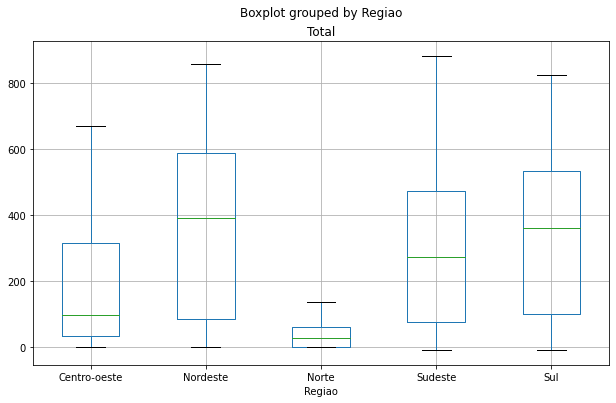

In [8]:
df.boxplot(column=["Total"], by="Regiao", figsize=(10, 6))

In [9]:
df[["Estado", "Total"]].groupby('Estado').describe().sort_values(by=[('Total', 'mean')], ascending=False)

Total                                                              \
        count        mean         std    min       25%      50%       75%   
Estado                                                                      
RN       22.0  537.359545  255.424144   0.00  417.8025  607.195  738.0800   
PE       33.0  529.862424  250.180046   0.00  390.0000  495.660  779.2200   
SC       33.0  457.214242  252.157124   0.00  327.6700  476.560  669.9700   
DF        9.0  342.620000  192.680375  49.60  303.9600  315.120  439.9000   
MG       99.0  333.200303  257.743247 -10.00   71.3400  321.250  540.4650   
SP      172.0  326.015756  251.400213  -5.50   86.7075  297.380  516.5000   
PR       47.0  293.335745  212.782689 -10.00  115.8050  299.610  484.7600   
BA       11.0  289.803636  206.286589   0.00  138.8250  326.720  403.4500   
PB       17.0  285.462941  195.941297   0.00  170.9300  270.590  436.4400   
RS       31.0  267.931935  237.938284   0.00   23.4650  304.590  445.9700   
RJ       79.0  234.454937  198.825926   0.00   52.9500  201.230  349.5650   
ES       18.0  151.223333  180.966759 -10.00   26.0300   89.155  212.1850   
MS       11.0  127.101818  146.437210   0.00   26.3250   44.800  208.7750   
MA        6.0   92.910000   70.932684   0.00   42.8050   99.650  131.1525   
SE        4.0   62.067500   23.279535  38.13   45.9825   60.050   76.1350   
AM       10.0   59.385000   51.940220   0.00   11.3250   53.395   91.5400   
PI        5.0   57.316000   57.909703   0.00    0.0000   55.000  115.5600   
GO        1.0   54.820000         NaN  54.82   54.8200   54.820   54.8200   
MT        6.0   54.135000   56.275392   0.00    6.5825   40.495  103.1775   
CE        2.0   44.250000   35.708892  19.00   31.6250   44.250   56.8750   
AL        2.0   30.655000   43.352717   0.00   15.3275   30.655   45.9825   
PA        7.0   12.034286   14.213921   0.00    0.0000    3.540   24.8500   

                
           max  
Estado          
RN      824.86  
PE      860.16  
SC      824.29  
DF      672.14  
MG      854.01  
SP      884.91  
PR      647.10  
BA      647.39  
PB      630.25  
RS      724.24  
RJ      729.29  
ES      737.39  
MS      413.82  
MA      192.65  
SE       90.04  
AM      136.34  
PI      116.02  
GO       54.82  
MT      124.47  
CE       69.50  
AL       61.31  
PA       31.00

<AxesSubplot:title={'center':'Total'}, xlabel='Estado'>

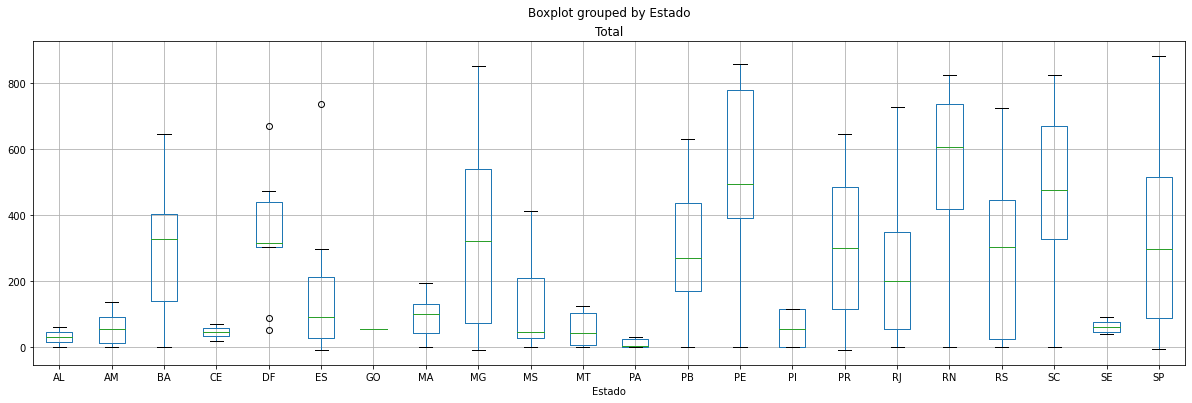

In [10]:
df.boxplot(column=["Total"], by="Estado", figsize=(20, 6))

<AxesSubplot:title={'center':'Total'}, xlabel='Equipe'>

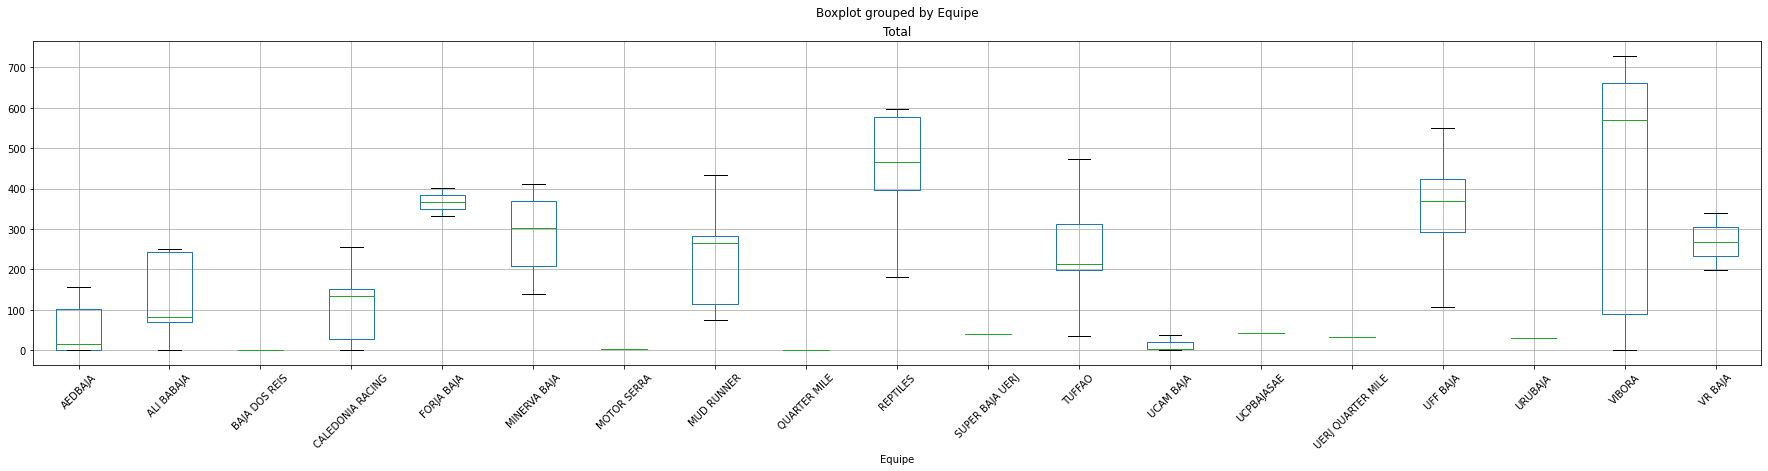

In [11]:
df[df["Estado"] == "RJ"].boxplot(column=["Total"], by="Equipe", figsize=(30, 6), rot=45)